# Drawing the multipanel barplot for Soil moisture: all AR6 land regions

In [1]:
ensembles = c('CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


In [3]:
# -- CMIP6
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')

json_data <- fromJSON(paste(readLines(json_file), collapse=""))
AR6_regions = names(json_data[['1.5']])

In [4]:
AR6_regions

[1] "ARP"  "CAF"  "CAR"  "CAU"  "CNA"  "EAN"  "EAS"  "EAU"  "ECA"  "EEU" 
[11] "ENA"  "ESAF" "ESB"  "GIC"  "MDG"  "MED"  "NAU"  "NCA"  "NEAF" "NEN" 
[21] "NES"  "NEU"  "NSA"  "NWN"  "NWS"  "NZ"   "RAR*" "RFE"  "SAH"  "SAM" 
[31] "SAS"  "SAU"  "SCA"  "SEA"  "SEAF" "SES"  "SSA"  "SWS"  "TIB"  "WAF" 
[41] "WAN"  "WCA"  "WCE"  "WNA"  "WSAF" "WSB"

### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [5]:
all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in AR6_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name

In [6]:
ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='historical_1995-2014'){ wclim_period='modern' }
    if (clim_period=='ssp585_2041-2060'){ wclim_period='8.5_mid' }
    if (clim_period=='ssp585_2081-2100'){ wclim_period='8.5_late' }
    if (clim_period=='ssp126_2041-2060'){ wclim_period='2.6_mid' }
    if (clim_period=='ssp126_2081-2100'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        percentiles = json_data[[clim_period]][[region_name]]
        if (percentiles[1]==-99999){
            percentiles = c(NA, NA, NA)
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = percentiles
        print(json_data[[clim_period]][[region_name]])
    }
}

[1] "1.5"
[1] -1.2885422  0.5445782  3.6110764
[1] -0.7128763  0.9816780  6.7050053
[1] -99999 -99999 -99999
[1] -3.8937364 -0.6879645  1.7413329
[1] -4.9006986 -0.8988124  2.0710563
[1] -99999 -99999 -99999
[1] -0.79376506  0.06865235  1.22560076
[1] -7.286620 -1.697951  2.037519
[1] -0.7838228  0.2691904  1.7436126
[1] -2.01556697 -0.05050235  2.35107873
[1] -1.1819238 -0.1572058  1.3461238
[1] -3.2123940 -1.0065561  0.8655578
[1] -4.782774 -0.958747  3.535488
[1] -2.6116697 -0.6454128  5.2796599
[1] -3.0268345 -0.4235739  1.8956304
[1] -3.18255478 -1.75902503 -0.09960144
[1] -3.570861 -0.314577  3.873505
[1] -3.8413150 -0.4644611  1.2823903
[1] -0.6263897  2.0569381  4.4368621
[1] -2.790832 -0.742187  6.256703
[1] -2.1312438 -0.6374314  0.9621482
[1] -1.68402506 -0.09378213  1.50233645
[1] -3.644228 -1.371524  0.282072
[1] -2.23842365 -0.06826023  3.92995540
[1] -1.3994546 -0.6290396  0.5613801
[1] -1.77268690 -0.06256457  1.43415982
[1] -2.39191604  0.07704171 10.87791802
[1] -3.97

In [7]:
names(json_data)

[1] "1.5"                                  
 [2] "1.5_historical_1995-2014"             
 [3] "2"                                    
 [4] "2_historical_1995-2014"               
 [5] "3"                                    
 [6] "3_historical_1995-2014"               
 [7] "4"                                    
 [8] "4_historical_1995-2014"               
 [9] "ssp126_2041-2060"                     
[10] "ssp126_2041-2060_historical_1995-2014"
[11] "ssp126_2081-2100"                     
[12] "ssp126_2081-2100_historical_1995-2014"
[13] "ssp585_2041-2060"                     
[14] "ssp585_2041-2060_historical_1995-2014"
[15] "ssp585_2081-2100"                     
[16] "ssp585_2081-2100_historical_1995-2014"

In [8]:
json_data[['ssp585_2041-2060_historical_1995-2014']]

list()

In [9]:
ensemble = 'CMIP5'
json_file = paste('/home/jservon/Chapter12_IPCC/data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))


clim_periods = c('baseline',
                 'rcp85_midfut', 'rcp85_farfut',
                 'rcp26_midfut', 'rcp26_farfut',
                 '1.5', '2', '3', '4')
#for (clim_period in names(json_data)){
for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        percentiles = json_data[[clim_period]][[region_name]]
        if (percentiles[1]==-99999){
            percentiles = c(NA, NA, NA)
        }
        #percentiles = c(NA,NA,NA)
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = percentiles
        #print(json_data[[clim_period]][[region_name]])
    }
}

[1] "1.5"
[1] "2"
[1] "3"
[1] "4"
[1] "2.6_late"
[1] "2.6_mid"
[1] "8.5_late"
[1] "8.5_mid"


In [10]:
names(json_data)

[1] "1.5"       "2"         "3"         "4"         "rcp26_far" "rcp26_mid"
[7] "rcp85_far" "rcp85_mid"

In [11]:
for (region_name in AR6_regions){
    print(region_name)
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    #ensemble = 'CORDEX'
    #all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    #all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    #all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    #all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    #all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    #all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

[1] "ARP"
[1] "CAF"
[1] "CAR"
[1] "CAU"
[1] "CNA"
[1] "EAN"
[1] "EAS"
[1] "EAU"
[1] "ECA"
[1] "EEU"
[1] "ENA"
[1] "ESAF"
[1] "ESB"
[1] "GIC"
[1] "MDG"
[1] "MED"
[1] "NAU"
[1] "NCA"
[1] "NEAF"
[1] "NEN"
[1] "NES"
[1] "NEU"
[1] "NSA"
[1] "NWN"
[1] "NWS"
[1] "NZ"
[1] "RAR*"
[1] "RFE"
[1] "SAH"
[1] "SAM"
[1] "SAS"
[1] "SAU"
[1] "SCA"
[1] "SEA"
[1] "SEAF"
[1] "SES"
[1] "SSA"
[1] "SWS"
[1] "TIB"
[1] "WAF"
[1] "WAN"
[1] "WCA"
[1] "WCE"
[1] "WNA"
[1] "WSAF"
[1] "WSB"


In [12]:
# -- Axe horizontal:
# --   - affecter un indice a chaque horizon + un indice CMIP6, CMIP5, et CORDEX
# --   - boucle sur les horizons / ensembles
# --   - tracer une ligne entre q10/q90 + point sur q50

In [13]:

"draw_legend_box_hor"=function(data, mar=c(0,0,4,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='', bty='n')
    text(-0.02,0.85, "Legend", font=2, cex=3, adj=0)
    linewidth = 0.07
    lwd=22
    #xcol1 = 0.25
    #ycol1 = 0.6
    xcol1 = 0.2
    ycol1 = 0.45
    space_between_cols = linewidth*1.4
    space_between_lines = 0.22
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 2.1
    cex_title = 2.3
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=1, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                    text(xcol, ycol1+space_between_lines*2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    xcol1 = 0.55
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5')){
        xcol = xcol1
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'r.past' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                text(xcol, ycol1+space_between_lines*2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/3, col='black')
    points(xx,ypos, pch=16, cex=2.6)
    text(xx+0.02,ypos+(ylen*1.1), "P90", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), "P10", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}

In [14]:
"cubic_root"=function(dat){
    if (is.na(dat[1])){
        return(c(NA,NA,NA))
    }else{
        tmp = rep(1, length(dat))
        tmp[which(dat<0)]=-1
        return(abs(dat)^(1/2) * tmp)
    }#
}

In [15]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CMIP5','CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    ylim=c(-20,20)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4,5, 6,7)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex+0.3)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(-20,20,by=5)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dumdat = data[[ensemble]][[horizon]][['vals']]
            dat = dumdat
            print(dat)
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + 2*delta
        }
        i = i + 1
    }

    
    
    # -- Y axis
    yvals = seq(-20,20,by=10)
    dumyvals = yvals
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=ylabels, las=1)
    par(cex=general_cex)

    # -- X axis
    axis(1, at=xvert, labels=rep('',length(xvert)))
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)
    # -- Vertical lines
    for (v in xvert){lines(c(v,v),ylim,type='l', lty=2)}

    bline = ylim[1] - 0.22*(ylim[2]-ylim[1])
    
    if (do_xlab=='TRUE'){
        cex_text = 2.2
        bline = ylim[1] - 0.23*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.4*(ylim[2]-ylim[1])
        lines(c(-0.1,3.2), c(bline,bline), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.19*(ylim[2]-ylim[1])
        text(0.7,btext2,"1.5", cex=cex_text, font=1, adj=c(0.5,0))
        text(2,btext2,"2", cex=cex_text, font=1, adj=c(0.5,0))
        text(3,btext2,"4", cex=cex_text, font=1, adj=c(0.5,0))

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 4.5
        xlate = 6.5
        btext3 = ylim[1] - 0.135*(ylim[2]-ylim[1])
        btext4 = ylim[1] - 0.17*(ylim[2]-ylim[1])
        text(xmid,btext2, "mi.", font=1, cex=cex_text, adj=c(0.5,0))
        text(xlate,btext2, "lo.", font=1, cex=cex_text, adj=c(0.5,0))

        time_slices = c(3.6,7.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab

    
}

"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE', mar=c(4,3,2.5,1),
                                    do_ylab_left = 'TRUE', do_ylab_right = 'FALSE'){
    #
    # -- Names
    ensembles = c('CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    ylim=c(-20,20)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4,5, 6,7)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(-20,20,by=10)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            if (is.null(dat)){dat = c(NA,NA,NA)}
            if (dat[1]<ylim[1]){
                text(j-0.5,ylim[1]+(ylim[2]-ylim[1])*0.05, round(dat[1],1), cex=1.7, font=1)
                dat[1] = ylim[1]
            }
            if (dat[3]>ylim[2]){
                text(j-0.5,ylim[2]-(ylim[2]-ylim[1])*0.05, round(dat[3],1), cex=1.7, font=1)
                dat[3] = ylim[2]
            }
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + 2*delta
        }
        i = i + 1
    }
    
    # -- Y axis
    yvals = seq(-20,20,by=10)
    dumyvals = yvals
    ylabels = yvals
    
    # -- Y axis left
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_left=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    # -- Y axis right
    if (do_ylab_right=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.35
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    
    if (do_xlab=='TRUE'){
        cex_text = 2
        bline = ylim[1] - 0.45*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.58*(ylim[2]-ylim[1])
        lines(c(0.5,3.2), c(bline*0.95,bline*0.95), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.23*(ylim[2]-ylim[1])
        adj_ts = c(0.5,0.5)
        adj_gwl = c(0.5,0.5)
        text(1,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(2,btext2,"2", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(3,btext2,"4", cex=cex_text, font=1, srt=90, adj=adj_gwl)

        # -- Labels time slices = modern, mid-term, long-term
        xmid = 4.5
        xlate = 6.5
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=adj_ts)

        time_slices = c(3.6,7.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab
    
    
}


[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late

[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CMIP5"
[1] "8.5_late

png 
  2

Warning message:
“package ‘IRdisplay’ was built under R version 3.6.3”


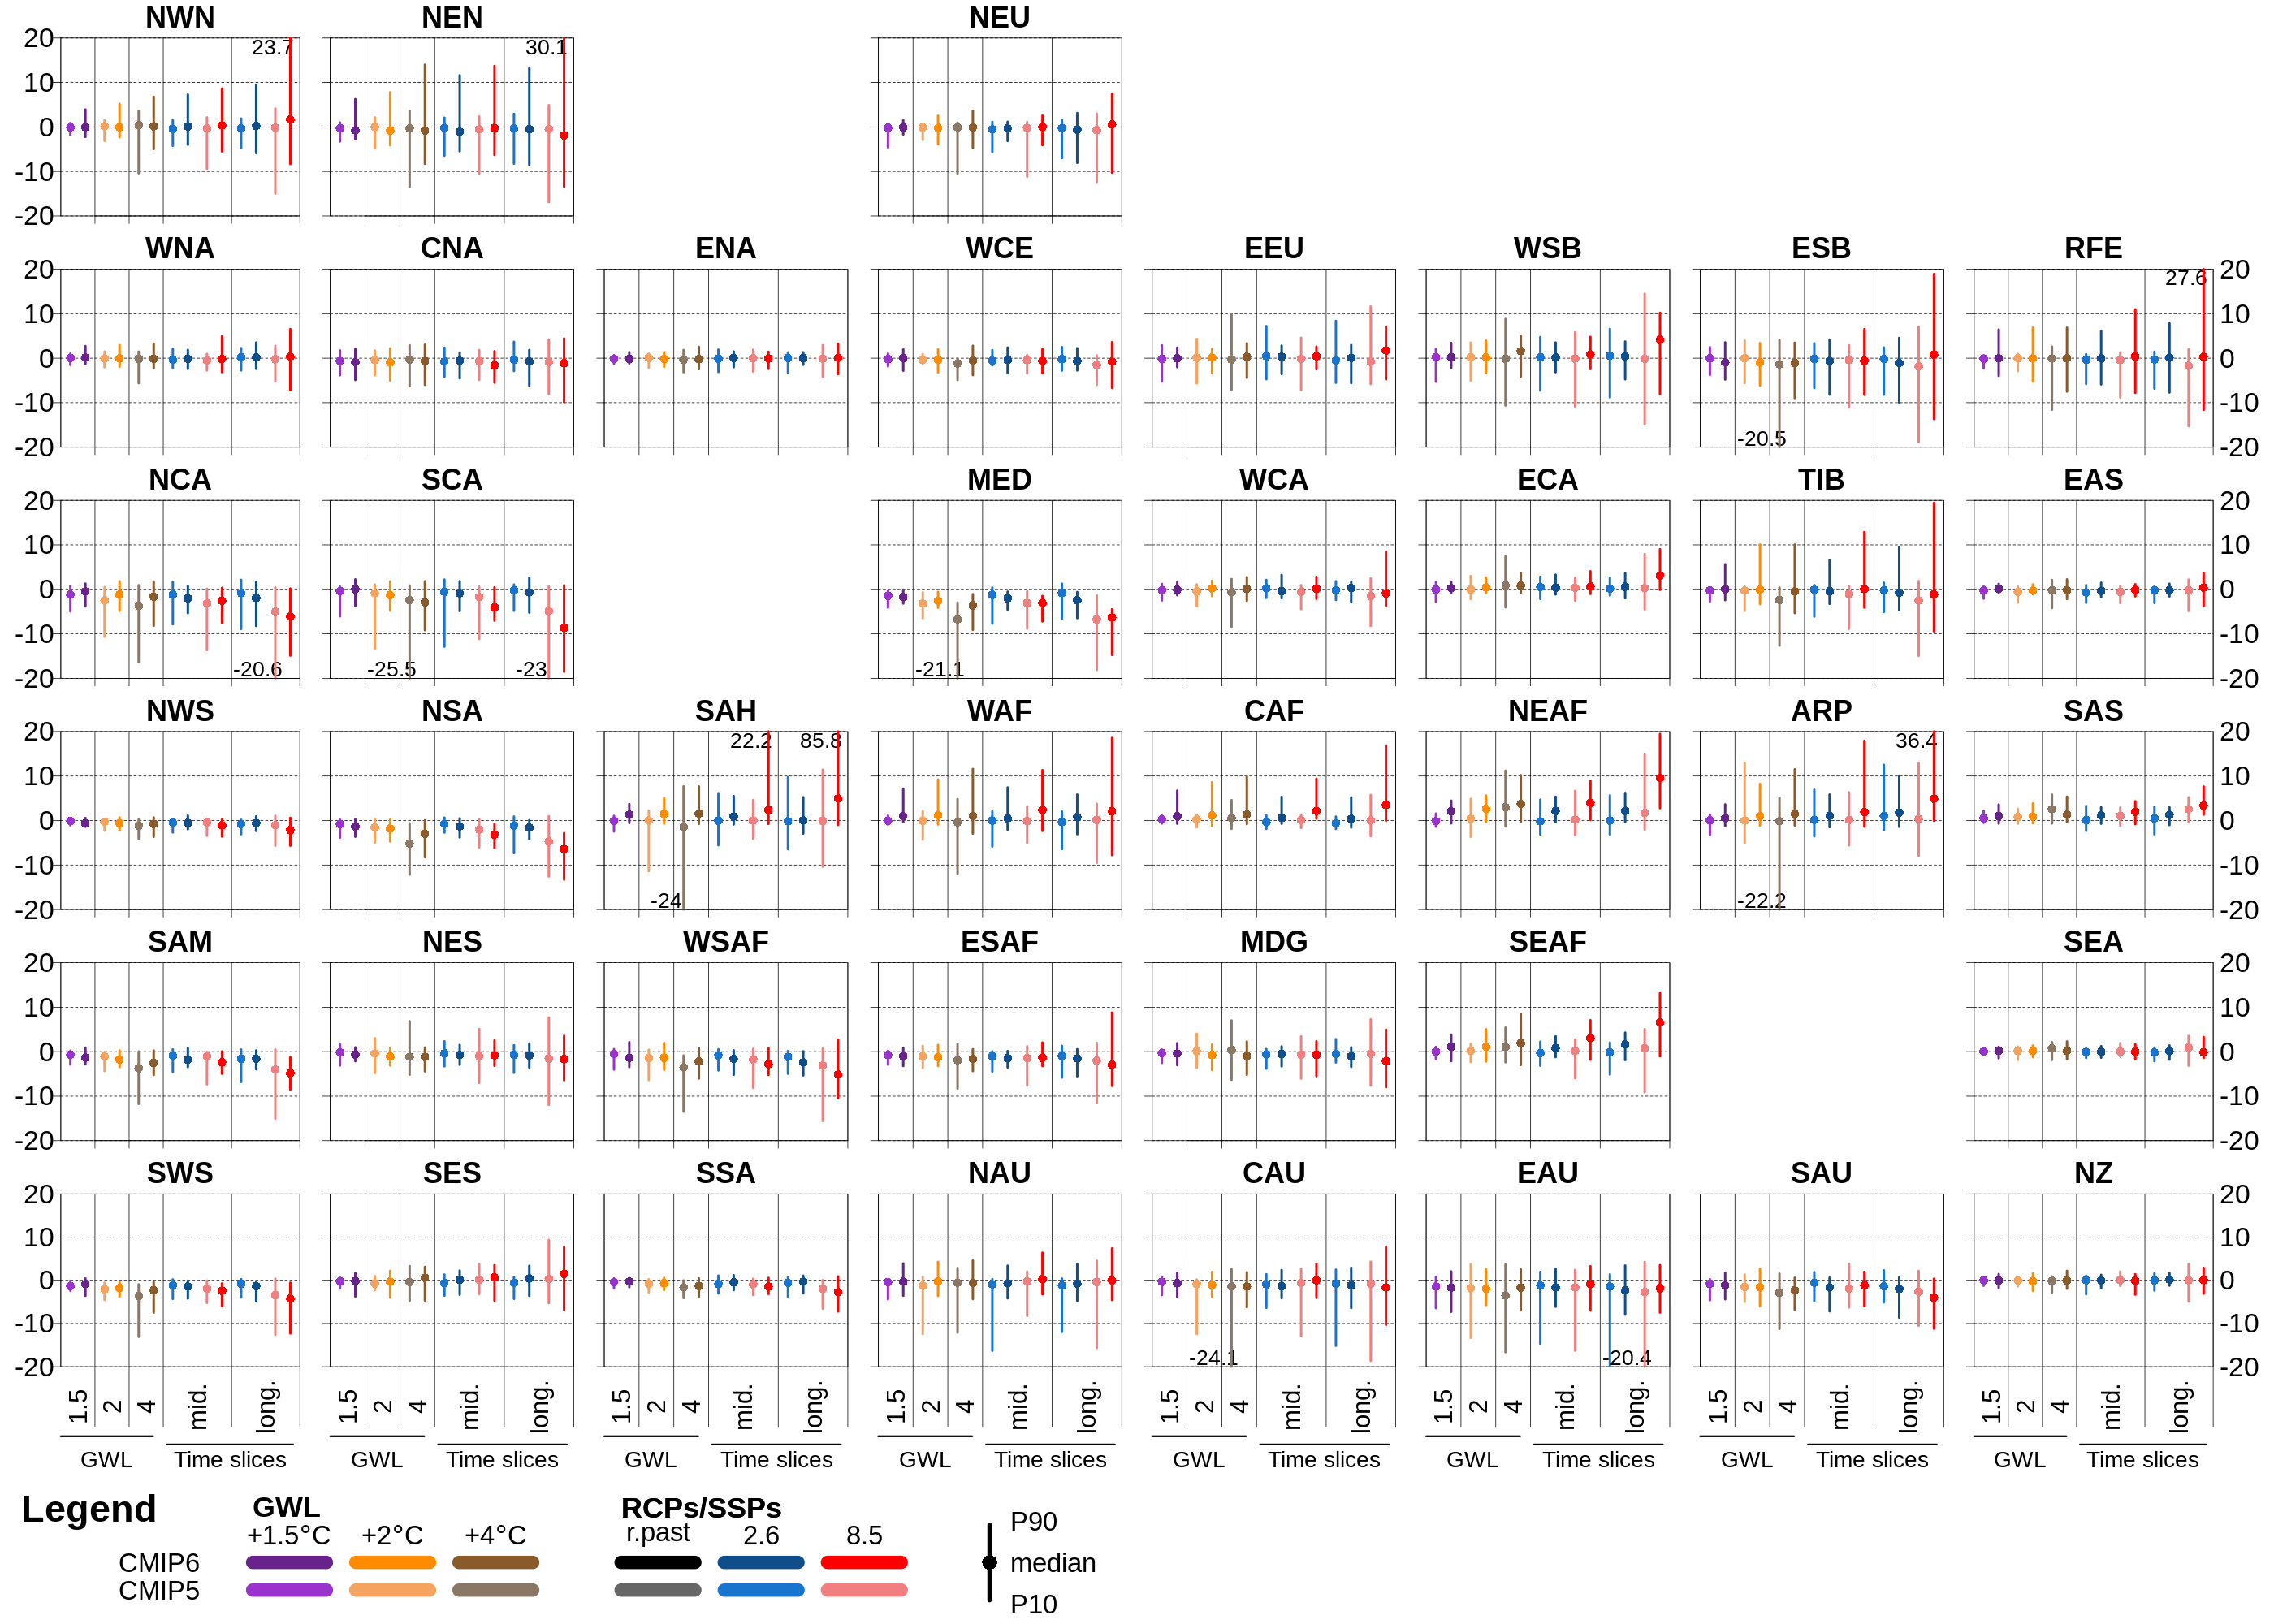

In [16]:
fsize = 2000
outfilename = paste('~/Chapter12_IPCC/figs/Satellite_barplots/Figure_S12.4_SM_satellite.png',sep='')
png(outfilename, width=fsize*1.4,height=fsize)

#NWN, NEN  NA  # NEU,  NA   NA,  RAR, NA  #
#WNA, CNA, ENA  # WCE, EEU, WSB, ESB, RFE  #
#NCA, SCA, CAR  # MED, WCA, ECA, TIB, EAS  #
#NWS, NSA # SAH,  WAF, CAF, NEAF, ARP, SAS  #
#SAM, NES # WSAF, ESAF, MDG, SEAF, NA, SEA 
#SWS, SES, SSA  # NAU, CAU, EAU, SAU, NZ  #
# Colorbar
mat = rbind(
    c(1, 2, 0, 3, 0, 0, 0, 0),
    c(4, 5, 6, 7, 8, 9, 10,11),
    c(12, 13,0, 14, 15,16,17,18),
    c(19, 20, 21,22,23,24,25,26),
    c(27, 28, 29,30,31,32,0, 33),
    c(34, 35,36,37,38,39,40,41),
    c(42, 42, 42, 42,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.35,1.7),widths=c(1.15,1,1,1,1,1,1,1.15))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    do_ylab_left = 'FALSE'
    do_ylab_right = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab = 'TRUE'
        mar[1]=4
    }else{
        do_xlab = 'FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        do_ylab_left = 'TRUE'
        mar[2]=4
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        do_ylab_right = 'TRUE'
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, mar=mar,
                            do_xlab=do_xlab, do_ylab_left = do_ylab_left, do_ylab_right=do_ylab_right)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")
display_png(file=outfilename)  

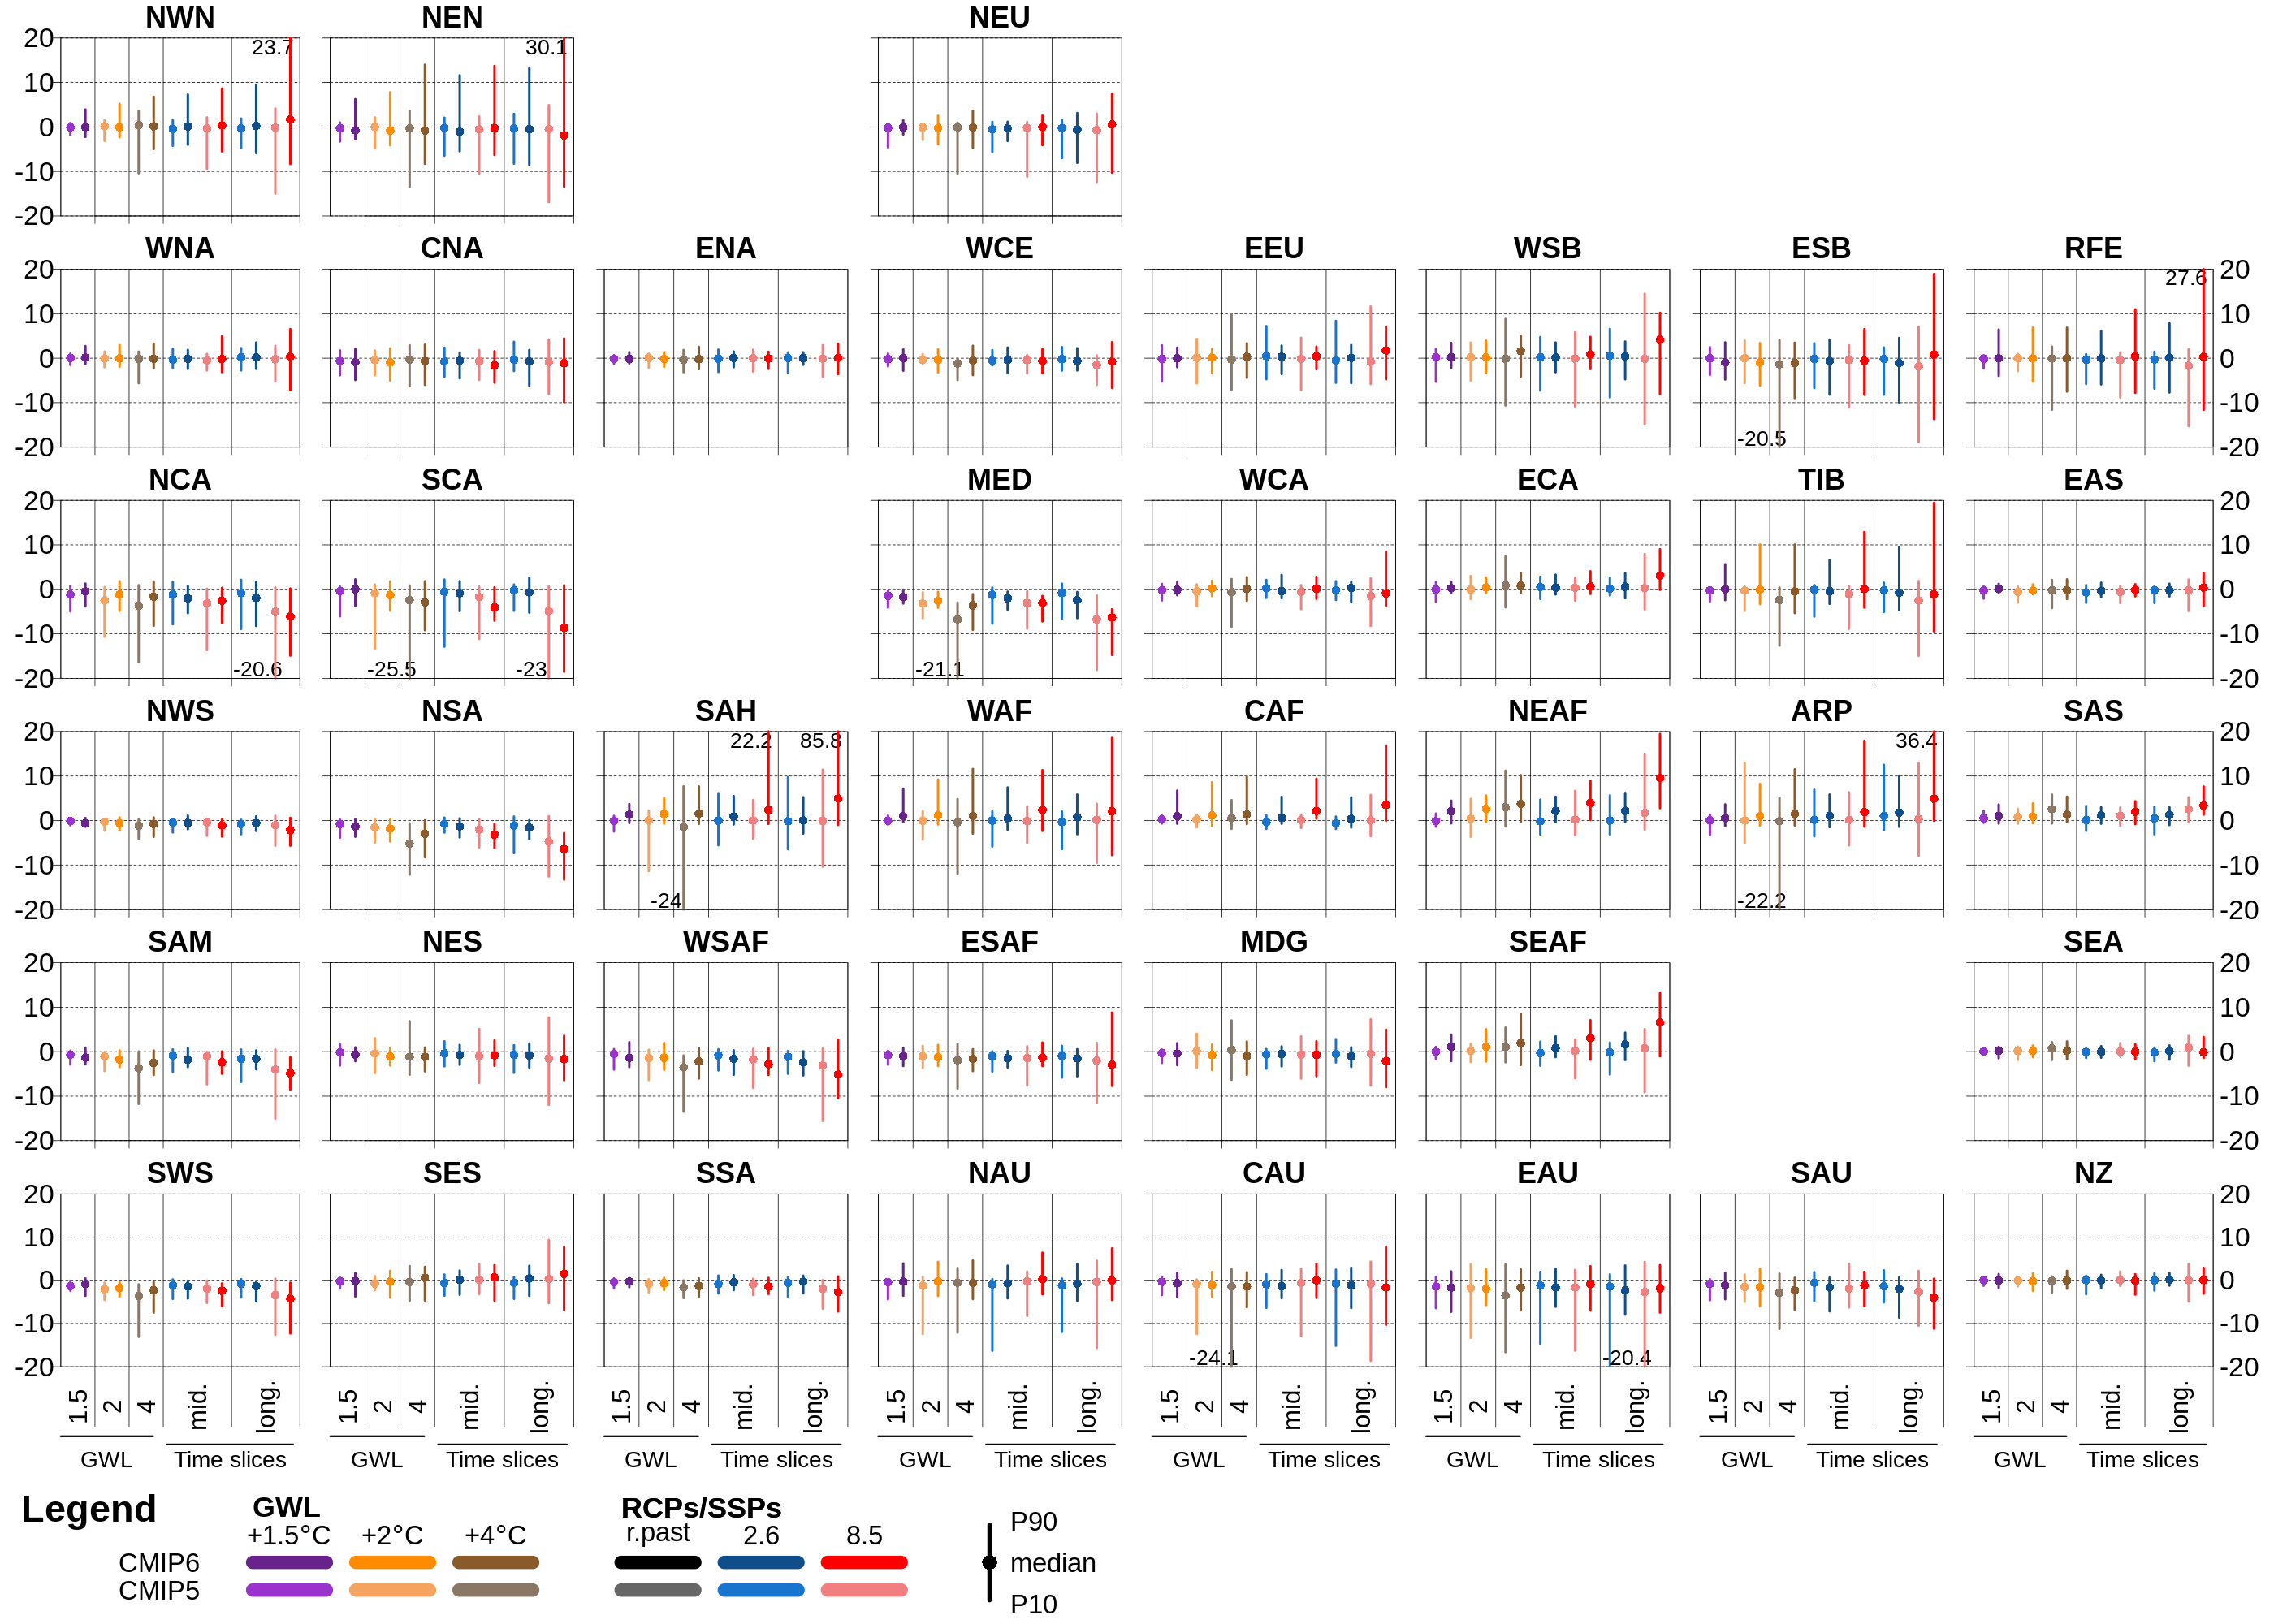

In [17]:
library("IRdisplay")
display_png(file=outfilename)  